## Importing Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to /home/yash-p/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_variants.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629867495&Signature=bpJSXuMBFMgoN3arEegsWZug%2BXvZGOLwZ02dfV9vu3zXIwUYnVFLDAz6D6gS%2BwyIpe2oreDFJM9aYpiz9Ln1DbuFAJJAJRLX%2Fh6BahlfFknbye7glYSyp%2Bpe9VGiNq3rNEj1fa5zT7xai7R4mUctoAzgV6iaxAzOapZ4jhhtYhkM%2BnNK3gpPympcfRkNqMcyULyvtV8%2BPeuFEO1ACvUxfzAXB8ODbvYmWwtrajGAOd%2FY3M8DyWL7L%2FbDfLDzS0u%2BxDyi%2BE69KWyJG%2Fc9jMQhs7F%2FXGD1sImbBDR3z28Efm0qA%2FPulUKKhkUBkZd%2FyJhXsMRPQ5asr%2B8%2BBm%2BidkU%2Ffg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_variants.zip" -c -O 'training_variants.zip'

--2021-08-22 10:55:02--  https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_variants.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629867495&Signature=bpJSXuMBFMgoN3arEegsWZug%2BXvZGOLwZ02dfV9vu3zXIwUYnVFLDAz6D6gS%2BwyIpe2oreDFJM9aYpiz9Ln1DbuFAJJAJRLX%2Fh6BahlfFknbye7glYSyp%2Bpe9VGiNq3rNEj1fa5zT7xai7R4mUctoAzgV6iaxAzOapZ4jhhtYhkM%2BnNK3gpPympcfRkNqMcyULyvtV8%2BPeuFEO1ACvUxfzAXB8ODbvYmWwtrajGAOd%2FY3M8DyWL7L%2FbDfLDzS0u%2BxDyi%2BE69KWyJG%2Fc9jMQhs7F%2FXGD1sImbBDR3z28Efm0qA%2FPulUKKhkUBkZd%2FyJhXsMRPQ5asr%2B8%2BBm%2BidkU%2Ffg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_variants.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; n

In [ ]:
# !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_text.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629867445&Signature=lBlfYgpSD%2Brmx4QHGjDYSXMrg%2FMxjHlhmpMR3ItI63TR1Udt07IEHtGFrocLkTdw4CnZ8jShAGLrJHLsOp%2B6T5dzcGB2dCfiARBmhhUE68kKCDcmSSJp42uqxsxl1AtUlGGKHnPcxlWXZ3msyx7SXsnBMlQl9IYXA9UGS%2FpaTTrXwFRKCHnekOL%2FQq9zpsCa7kslh7HGMMWtKb%2Bd2tREjyHWrOh0sOOcljrg7HIqgZDX3aruqAxA0mKywxklw%2B8sfC37g4cyauWIN4XmWWom%2B0WSEmo4631lvXs8DkfoUHDNmK133w6FaV2G%2BWq7nA4WduL%2FI1aGVbBYJnKJxLuKYg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_text.zip" -c -O 'training_text.zip'

--2021-08-22 10:55:03--  https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_text.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629867445&Signature=lBlfYgpSD%2Brmx4QHGjDYSXMrg%2FMxjHlhmpMR3ItI63TR1Udt07IEHtGFrocLkTdw4CnZ8jShAGLrJHLsOp%2B6T5dzcGB2dCfiARBmhhUE68kKCDcmSSJp42uqxsxl1AtUlGGKHnPcxlWXZ3msyx7SXsnBMlQl9IYXA9UGS%2FpaTTrXwFRKCHnekOL%2FQq9zpsCa7kslh7HGMMWtKb%2Bd2tREjyHWrOh0sOOcljrg7HIqgZDX3aruqAxA0mKywxklw%2B8sfC37g4cyauWIN4XmWWom%2B0WSEmo4631lvXs8DkfoUHDNmK133w6FaV2G%2BWq7nA4WduL%2FI1aGVbBYJnKJxLuKYg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_text.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
# !unzip /content/training_text.zip

Archive:  /content/training_text.zip
replace training_text? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# !unzip /content/training_variants.zip

Archive:  /content/training_variants.zip
replace training_variants? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Reading Data

<h3>Reading Gene and Variation Data</h3>

In [4]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>Reading Text Data</h3>

In [5]:
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


## Preprocessing text data

In [6]:
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
            
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [ ]:
12#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 30.295589 seconds


In [7]:
data_text.iloc[0]['TEXT']

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [8]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


Replacing NaN for missing text with Gene and Variation

In [10]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [11]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


## Test, Train and Cross Validation Split

### Splitting data into train, test and cross validation (64:20:16)

In [12]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

Splitting the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set

In [13]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


### Distribution of y_i's in Train, Test and Cross Validation datasets

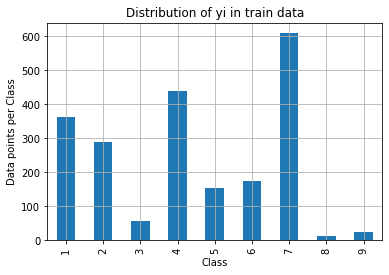

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


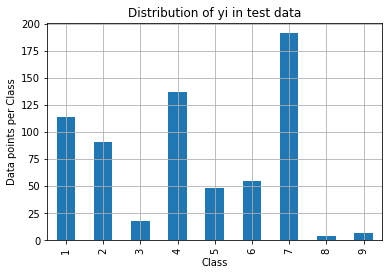

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


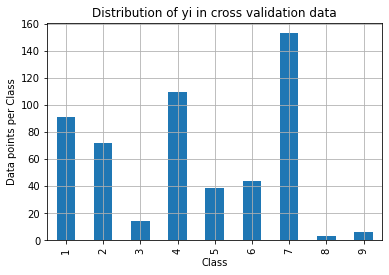

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [14]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

## Prediction using a 'Random' Model

In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1.

In [15]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    # Recall Matrix

    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that row
    
    # C = [[1, 2],
    #     [3, 4]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    # Precision Matrix 
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that column
    # C = [[1, 2],
    #     [3, 4]]

    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.522705867448431
Log loss on Test Data using Random Model 2.45112457254186
-------------------- Confusion matrix --------------------


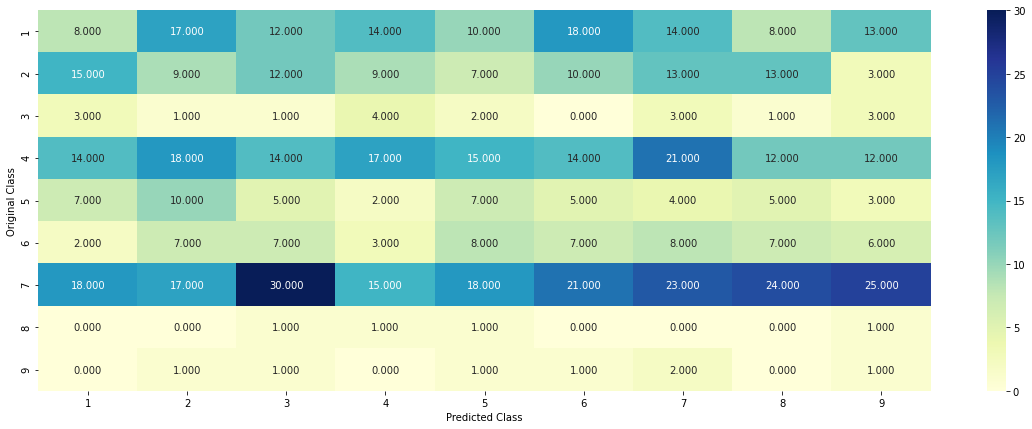

-------------------- Precision matrix (Columm Sum=1) --------------------


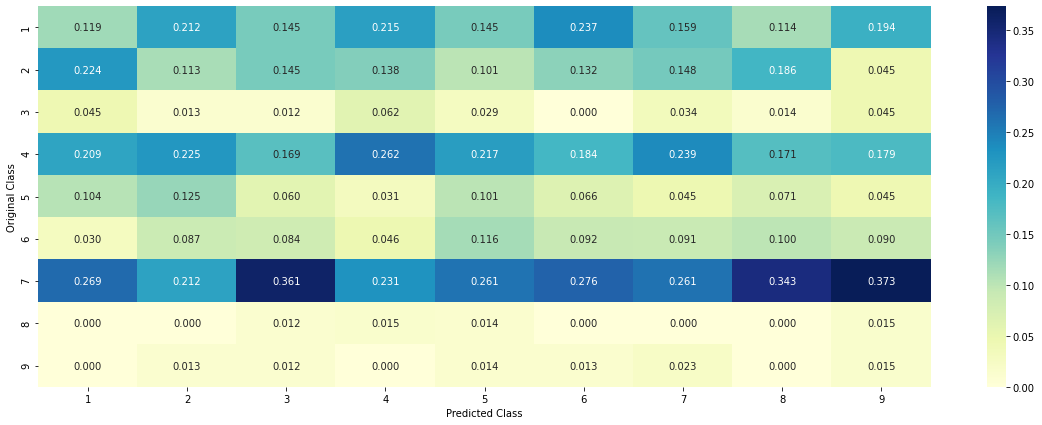

-------------------- Recall matrix (Row sum=1) --------------------


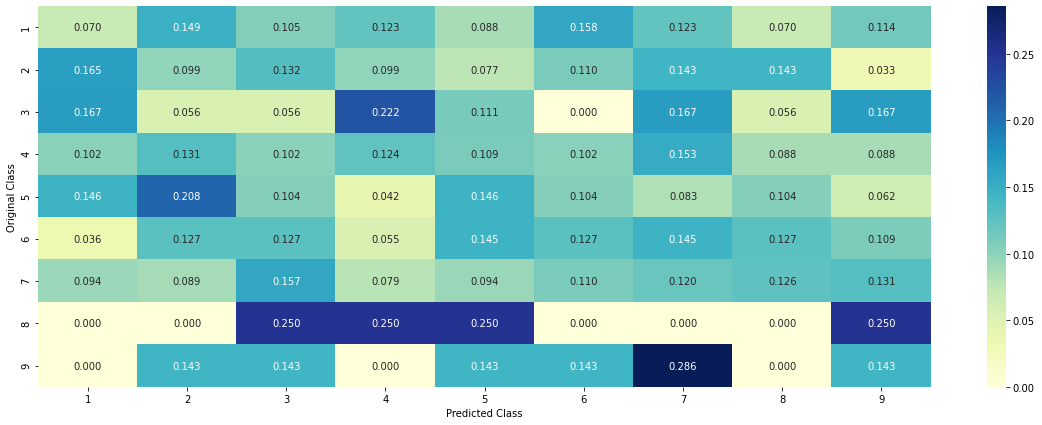

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

## Univariate Analysis

In [16]:
def get_gv_fea_dict(alpha, feature, df):
    # value_count contains the number of unique features. 
    value_count = train_df[feature].value_counts()
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            # using laplace smoothing to prevent 0 division errors. 
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

### Univariate Analysis on Gene Feature

Gene is a categorical variable

In [17]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# 10 most frequent genes
print(unique_genes.head(10))

Number of Unique Genes : 233
BRCA1     166
TP53      102
EGFR       91
BRCA2      81
PTEN       80
KIT        66
BRAF       55
ERBB2      51
ALK        51
PDGFRA     44
Name: Gene, dtype: int64


In [18]:
print(f"There are {unique_genes.shape[0]} different categories of genes in the train data, and they are distibuted as follows")

There are 233 different categories of genes in the train data, and they are distibuted as follows


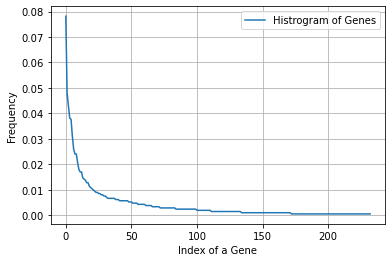

In [19]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

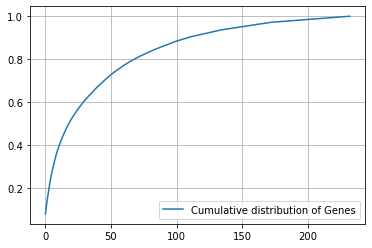

In [20]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

#### There are two ways to featurize Gene Feature. 
1. One Hot Encoding
2. Response Coding

One Hot Encoding is better suited for Logistic Regression while Response Coding is better when a Random Forest Model is being used. 

In [21]:
# Response Coding
alpha = 1
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [22]:
print(f"train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: {train_gene_feature_responseCoding.shape}")

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [23]:
# One Hot Encoding
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [24]:
train_df['Gene'].head()

714      ERBB2
665     CDKN2A
2616     BRCA1
719      ERBB2
2672     BRCA1
Name: Gene, dtype: object

In [25]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid2',
 'asxl1',
 'atm',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf3',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'fubp1',
 'gata3',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1r',
 'ikbke',
 'il7r',

In [26]:
print(f"train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: {train_gene_feature_onehotCoding.shape}")

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 233)


### How good is this gene feature  in predicting y_i?

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha = 1e-05, log loss is 1.2090993625309527
For values of alpha = 0.0001, log loss is 1.186652779827857
For values of alpha = 0.001, log loss is 1.2385452614459365
For values of alpha = 0.01, log loss is 1.373288166701711
For values of alpha = 0.1, log loss is 1.4990412313259571
For values of alpha = 1, log loss is 1.535756247316393


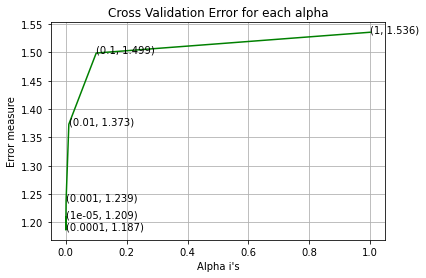

For values of best alpha  0.0001, train log loss is 1.0035964576545409
For values of best alpha  0.0001, cv log loss is 1.186652779827857
For values of best alpha  0.0001, test log loss is 1.158822514911786


In [31]:
alpha = [10 ** x for x in range(-5, 1)] 

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
#     print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print(f"For values of alpha = {i}, log loss is {log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)}")

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print(f"For values of best alpha  {alpha[best_alpha]}, train log loss is {log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)}")
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print(f"For values of best alpha  {alpha[best_alpha]}, cv log loss is {log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)}")
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print(f"For values of best alpha  {alpha[best_alpha]}, test log loss is {log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)}")

The Gene Feature is not stable, because the CV and Test errors are much more significant the train error. 

In [33]:
print(f"Checking how many data points in Test and CV datasets are covered by the {unique_genes.shape[0]} genes in train dataset")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print(f'1. In Test data {test_coverage} out of {test_df.shape[0]} : {(test_coverage/test_df.shape[0])*100}')
print(f'2. In CV data {cv_coverage} out of {cv_df.shape[0]} : {(cv_coverage/cv_df.shape[0])*100}')

Checking how many data points in Test and CV datasets are covered by the 233 genes in train dataset
1. In Test data 645 out of 665 : 96.99248120300751
2. In CV data 514 out of 532 : 96.61654135338345


### Univariate Analysis on Variation Feature

Variation is a categorical feature

In [34]:
unique_variations = train_df['Variation'].value_counts()
print(f'Number of Unique Variations  {unique_variations.shape[0]}')
# 10 most frequent variations
print(unique_variations.head(10))

Number of Unique Variations  1922
Truncating_Mutations    65
Deletion                49
Amplification           46
Fusions                 24
Overexpression           5
Q61H                     3
G12V                     3
P130S                    2
Q61L                     2
G67R                     2
Name: Variation, dtype: int64


In [35]:
print(f"There are {unique_variations.shape[0]} different variations in the train data and their distribution is as follows")

There are 1922 different variations in the train data and their distribution is as follows


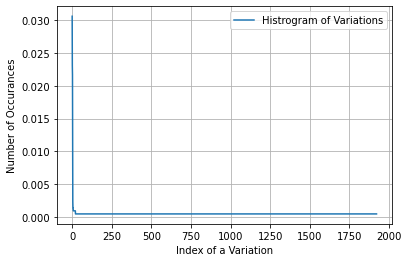

In [36]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.03060264 0.05367232 0.07532957 ... 0.99905838 0.99952919 1.        ]


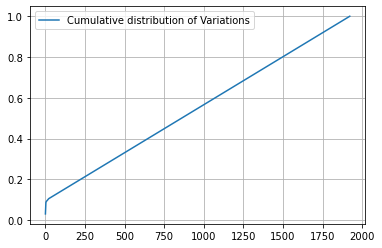

In [37]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

#### There are two ways to featurize Gene Feature. 
1. One Hot Encoding
2. Response Coding

Trying out both methods 

In [38]:
alpha = 1
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [39]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: {train_variation_feature_responseCoding.shape}")

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: {train_variation_feature_responseCoding.shape}


In [40]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [41]:
print(f"train_variation_feature_onehotEncoded is converted feature using the one-hot encoding method. The shape of Variation feature: {train_variation_feature_onehotCoding.shape}")

train_variation_feature_onehotEncoded is converted feature using the one-hot encoding method. The shape of Variation feature: (2124, 1952)


#### Creating a Model with just Gene Variations Feature

For values of alpha =  1e-05 The log loss is: 1.721145008444214
For values of alpha =  0.0001 The log loss is: 1.7165253464518413
For values of alpha =  0.001 The log loss is: 1.7228235793973485
For values of alpha =  0.01 The log loss is: 1.7346609561363753
For values of alpha =  0.1 The log loss is: 1.7382516312664016
For values of alpha =  1 The log loss is: 1.7406175290573789


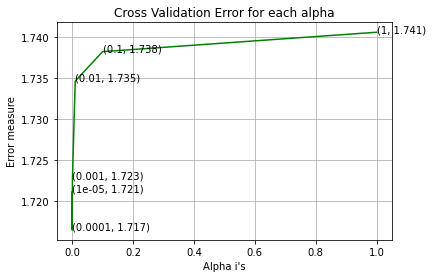

For values of best alpha  0.0001, train log loss is 0.6886846568357387
For values of best alpha  0.0001, cv log loss is 1.7165253464518413
For values of best alpha  0.0001, test log loss is 1.716104586377201


In [43]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print(f"For values of best alpha  {alpha[best_alpha]}, train log loss is {log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)}")
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print(f"For values of best alpha  {alpha[best_alpha]}, cv log loss is {log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)}")
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print(f"For values of best alpha  {alpha[best_alpha]}, test log loss is {log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)}")

Variation Feature seems to be unstable because of the difference of log loss between Train and CV/Test values. 

In [47]:
print(f"Looking for the number of common variations between Train and CV/Test Datasets. Total Number of genes: {unique_variations.shape[0]}")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print(f'Total Number of Variations in Test Dataset: {test_df.shape[0]}. Common Variations between Test and Train: {test_coverage} : {test_coverage/test_df.shape[0]*100}%')
print(f'Total Number of Variations in Test Dataset: {cv_df.shape[0]}. Common Variations between Test and Train: {cv_coverage} : {cv_coverage/cv_df.shape[0]*100}%')

Looking for the number of common variations between Train and CV/Test Datasets. Total Number of genes: 1922
Total Number of Variations in Test Dataset: 665. Common Variations between Test and Train: 60 : 9.022556390977442%
Total Number of Variations in Test Dataset: 532. Common Variations between Test and Train: 56 : 10.526315789473683%


### Univariate Analysis on Text Feature

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [48]:
def extract_dictionary_paddle(cls_text):
    """
    This funciton extracts all words in all the text data and their count. The dictionary contains all unique words in the dataset along with their counts. 
    """
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [49]:
def get_text_responsecoding(df):
    """
    Stores the probability of a word appearing in text of each variation
    """
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [50]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 54454


In [51]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)

confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [52]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [53]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [54]:
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [55]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [56]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5418, 4: 3690, 6: 3172, 5: 3006, 8: 2102, 9: 2060, 7: 1757, 10: 1572, 12: 1260, 11: 1088, 14: 1059, 16: 883, 13: 834, 15: 737, 18: 733, 17: 724, 20: 662, 21: 563, 19: 517, 22: 512, 24: 501, 25: 392, 23: 392, 26: 390, 28: 382, 42: 378, 27: 362, 30: 320, 32: 291, 52: 279, 36: 274, 34: 270, 35: 268, 29: 267, 33: 261, 31: 251, 40: 236, 37: 221, 45: 215, 39: 205, 48: 201, 43: 196, 38: 193, 44: 182, 41: 172, 50: 165, 46: 163, 49: 161, 54: 155, 58: 154, 51: 145, 63: 141, 60: 141, 56: 140, 55: 129, 59: 127, 57: 127, 53: 126, 47: 123, 65: 122, 68: 117, 64: 114, 66: 113, 70: 112, 90: 105, 72: 105, 69: 105, 62: 100, 61: 93, 76: 84, 84: 83, 75: 83, 71: 81, 80: 80, 67: 78, 78: 77, 85: 76, 73: 76, 88: 75, 92: 74, 79: 74, 77: 73, 82: 71, 100: 70, 98: 68, 86: 68, 89: 67, 87: 67, 74: 67, 110: 65, 94: 60, 96: 59, 83: 59, 81: 59, 107: 58, 109: 57, 91: 56, 102: 55, 117: 53, 104: 53, 97: 52, 106: 51, 103: 51, 108: 50, 95: 50, 128: 49, 115: 49, 93: 49, 135: 48, 114: 48, 99: 48, 122: 47, 139: 46,

For values of alpha =  1e-05 The log loss is: 1.3385015060533039
For values of alpha =  0.0001 The log loss is: 1.1856184069297067
For values of alpha =  0.001 The log loss is: 1.2176339325669019
For values of alpha =  0.01 The log loss is: 1.3449044331037563
For values of alpha =  0.1 The log loss is: 1.532314817971764
For values of alpha =  1 The log loss is: 1.6965275062154006


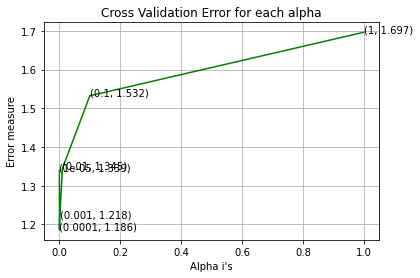

For values of best alpha =  0.0001 The train log loss is: 0.680965296187792
For values of best alpha =  0.0001 The cross validation log loss is: 1.1856184069297067
For values of best alpha =  0.0001 The test log loss is: 1.0713273284894769


In [57]:
# Training a Calibrated Logistic Regression Model only on Text Features that are one hot encoded. 
alpha = [10 ** x for x in range(-5, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [58]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [59]:
len1,len2 = get_intersec_text(test_df)
print(f"{np.round((len2/len1)*100, 3)} % of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(f"{np.round((len2/len1)*100, 3)} % of word of Cross Validation appeared in train data")

97.278 % of word of test data appeared in train data
98.455 % of word of Cross Validation appeared in train data


## Machine Learning Models

In [61]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)
    # for calculating log_loss we will provide the array of probabilities belongs to each class
    print(f"Log loss : {log_loss(test_y, sig_clf.predict_proba(test_x))}")
    # calculating the number of data points that are misclassified
    print(f"Number of mis-classified points : {np.count_nonzero((pred_y- test_y))/test_y.shape[0]}")
    plot_confusion_matrix(test_y, pred_y)

In [ ]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [62]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(f"{i} Gene Feature {word} present in test data point : {yes_no}")
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(f"{i} Variation Feature {word} present in test data point {yes_no}")
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(f"{i} Text Feature {word} present in test data point {yes_no}")
    print(f"Out of the top {no_features} features {word_present} are present in query point")

### Stacking the three types of features

In [63]:
# merging gene, variance and text features
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [64]:
print("One hot encoding features :")
print(f"(number of data points, number of features) in train data = {train_x_onehotCoding.shape}")
print(f"(number of data points, number of features) in test data = {test_x_onehotCoding.shape}")
print(f"(number of data points, number of features) in cross validation data = {cv_x_onehotCoding.shape}")

One hot encoding features :
(number of data points, number of features) in train data = (2124, 56639)
(number of data points, number of features) in test data = (665, 56639)
(number of data points, number of features) in cross validation data = (532, 56639)


In [65]:
train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))

In [66]:
print("Response encoding features :")
print(f"(number of data points, number of features) in train data = {train_x_responseCoding.shape}")
print(f"(number of data points, number of features) in test data = {test_x_responseCoding.shape}")
print(f"(number of data points, number of features) in cross validation data = {cv_x_responseCoding.shape}")

Response encoding features :
(number of data points, number of features) in train data = (2124, 27)
(number of data points, number of features) in test data = (665, 27)
(number of data points, number of features) in cross validation data = (532, 27)


## Base Line Models

### Naive Bayes
Naive Bayes works well with Text Data. Using MultiNominal Naive Bayes since there are multiple classes. 

#### Hyper parameter tuning

for alpha = 1e-05
Log Loss : 1.299933993002491
for alpha = 0.0001
Log Loss : 1.299766209334091
for alpha = 0.001
Log Loss : 1.3014946520407658
for alpha = 0.1
Log Loss : 1.2841358542178027
for alpha = 1
Log Loss : 1.3192116286438065
for alpha = 10
Log Loss : 1.4096722790836953
for alpha = 100
Log Loss : 1.4408815777543247
for alpha = 1000
Log Loss : 1.392935680688824


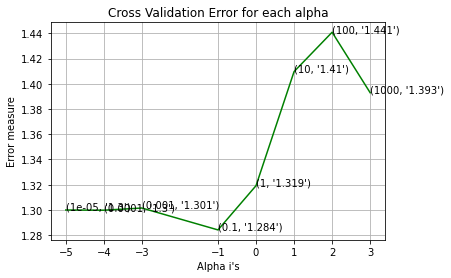

For values of best alpha = 0.1, the train log loss is: 0.8790474874559469
For values of best alpha = 0.1, the cv log loss is: 1.2841358542178027
For values of best alpha = 0.1, the test log loss is: 1.2397226985182568


In [69]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print(f"for alpha = {i}")
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print(f"Log Loss : {log_loss(cv_y, sig_clf_probs)}") 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print(f"For values of best alpha = {alpha[best_alpha]}, the train log loss is: {log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)}")
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print(f"For values of best alpha = {alpha[best_alpha]}, the cv log loss is: {log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)}")
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print(f"For values of best alpha = {alpha[best_alpha]}, the test log loss is: {log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)}")

#### Testing the model with best hyper paramters

Log Loss :1.2841358542178027
Number of missclassified point : 0.40601503759398494
-------------------- Confusion matrix --------------------


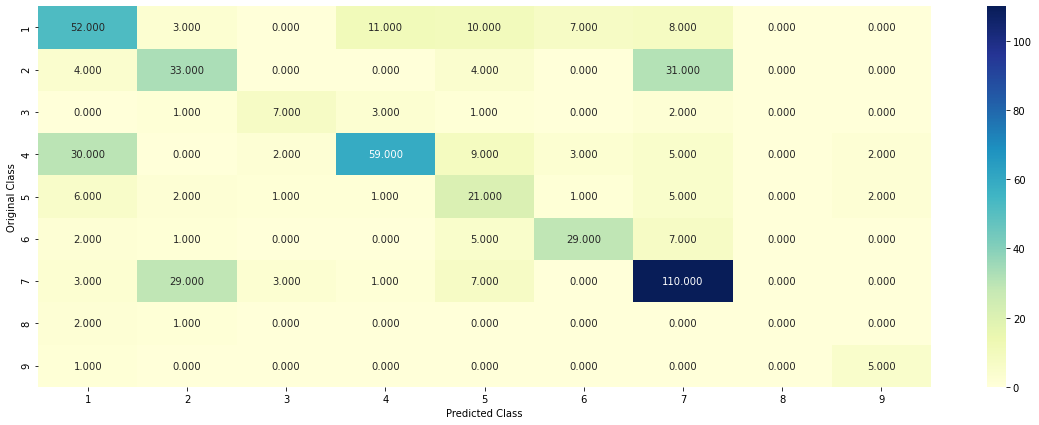

-------------------- Precision matrix (Columm Sum=1) --------------------


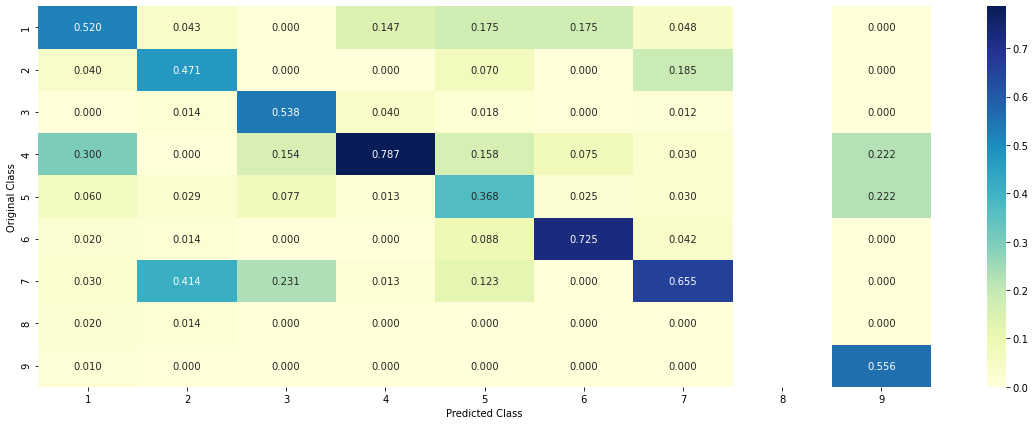

-------------------- Recall matrix (Row sum=1) --------------------


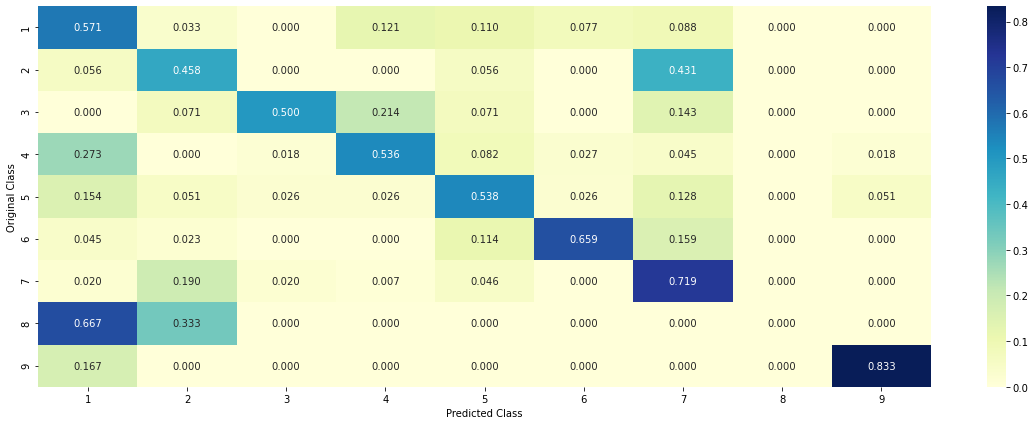

In [70]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
print(f"Log Loss :{log_loss(cv_y, sig_clf_probs)}")
print(f"Number of missclassified point : {np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0]}")
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

#### Feature Importance, Correctly classified points

In [85]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print(f"Predicted Class : {predicted_cls[0]}")
print(f"Predicted Class Probabilities: {np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4)}")
print(f"Actual Class : {test_y[test_point_index]}")

indices=np.argsort(-1*(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0935 0.437  0.0143 0.1182 0.0409 0.0395 0.247  0.0057 0.0038]]
Actual Class : 2
--------------------------------------------------
17 Text feature [identified] present in test data point [True]
18 Text feature [harbored] present in test data point [True]
19 Text feature [clinical] present in test data point [True]
20 Text feature [other] present in test data point [True]
21 Text feature [all] present in test data point [True]
22 Text feature [molecular] present in test data point [True]
26 Text feature [in] present in test data point [True]
27 Text feature [kinase] present in test data point [True]
28 Text feature [another] present in test data point [True]
29 Text feature [including] present in test data point [True]
30 Text feature [sequencing] present in test data point [True]
31 Text feature [confirmed] present in test data point [True]
32 Text feature [and] present in test data point [True]
33 Text feature [present] present in

In [86]:
test_df['TEXT'].iloc[test_point_index]

'Gastrointestinal stromal tumors (GIST) are characterized by a strong KIT receptor activation most often resulting from KIT mutations. In a smaller subgroup of tumors without KIT mutations, analogous activating mutations are found in the platelet-derived growth factor receptor a (PDGFRa) gene. Both PDGFRa and KIT receptors are targets of the tyrosine kinase inhibitor imatinib (Glivec) which has improved the treatment of advanced GISTs significantly. However, a subgroup of tumors show a secondary progress under therapy with imatinib after initial response. One possible mechanism of secondary resistance is the development of newly acquired KIT mutations. In the present study, we evaluated the frequency of such secondary KIT mutations in a series of GIST patients in which tumor tissue was resected under treatment. We examined one to seven different tumor areas in 32 cases (total of 104 samples) and found up to four newly acquired KIT mutations in 14 patients (43.8%). These were always loc

In [83]:
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
indices[0]

array([28319, 30281, 30280, 30276, 30274, 30273, 30272, 30262, 30259,
       30257, 30255, 30253, 30252, 30250, 30246, 30245, 30244, 30241,
       30239, 30235, 30231, 30230, 30226, 30225, 30224, 30218, 30217,
       30215, 30282, 30214, 30285, 30288, 30337, 30336, 30334, 30333,
       30330, 30329, 30328, 30327, 30325, 30324, 30323, 30322, 30318,
       30317, 30316, 30312, 30308, 30307, 30306, 30305, 30303, 30302,
       30299, 30297, 30294, 30292, 30289, 30287, 30213, 30212, 30211,
       30145, 30144, 30143, 30140, 30139, 30138, 30132, 30130, 30127,
       30125, 30121, 30120, 30118, 30116, 30109, 30100, 30099, 30097,
       30093, 30091, 30089, 30088, 30087, 30086, 30083, 30082, 30074,
       30146, 30147, 30148, 30150, 30210, 30209, 30208, 30207, 30206,
       30205])

In [75]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [87]:
for i in range(10):
  test_point_index = i
  no_feature = 100
  predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
  print("Predicted Class :", predicted_cls[0])
  print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
  print("Actual Class :", test_y[test_point_index])
  indices=np.argsort(-1*(clf.coef_))[predicted_cls-1][:,:]
  print("-"*50)
  get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0958 0.5277 0.0145 0.1212 0.0419 0.0405 0.1486 0.0059 0.0039]]
Actual Class : 2
--------------------------------------------------
16 Text feature [novel] present in test data point [True]
19 Text feature [clinical] present in test data point [True]
20 Text feature [other] present in test data point [True]
21 Text feature [all] present in test data point [True]
26 Text feature [in] present in test data point [True]
27 Text feature [kinase] present in test data point [True]
28 Text feature [another] present in test data point [True]
29 Text feature [including] present in test data point [True]
30 Text feature [sequencing] present in test data point [True]
32 Text feature [and] present in test data point [True]
33 Text feature [present] present in test data point [True]
34 Text feature [an] present in test data point [True]
35 Text feature [or] present in test data point [True]
36 Text feature [patient] present in test data point [Tr

233 Text feature [addition] present in test data point [True]
235 Text feature [known] present in test data point [True]
236 Text feature [resulted] present in test data point [True]
238 Text feature [inhibition] present in test data point [True]
239 Text feature [downstream] present in test data point [True]
240 Text feature [did] present in test data point [True]
244 Text feature [followed] present in test data point [True]
245 Text feature [consistent] present in test data point [True]
250 Text feature [previous] present in test data point [True]
252 Text feature [showed] present in test data point [True]
253 Text feature [without] present in test data point [True]
254 Text feature [13] present in test data point [True]
257 Text feature [total] present in test data point [True]
259 Text feature [part] present in test data point [True]
260 Text feature [after] present in test data point [True]
261 Text feature [between] present in test data point [True]
262 Text feature [encode] pres

546 Text feature [target] present in test data point [True]
555 Text feature [expressed] present in test data point [True]
558 Text feature [rate] present in test data point [True]
560 Text feature [negative] present in test data point [True]
561 Text feature [statistically] present in test data point [True]
562 Text feature [phase] present in test data point [True]
564 Text feature [analyses] present in test data point [True]
566 Text feature [associated] present in test data point [True]
567 Text feature [software] present in test data point [True]
569 Text feature [points] present in test data point [True]
570 Text feature [might] present in test data point [True]
575 Text feature [weeks] present in test data point [True]
581 Text feature [original] present in test data point [True]
599 Text feature [37] present in test data point [True]
600 Text feature [analyzed] present in test data point [True]
601 Text feature [control] present in test data point [True]
602 Text feature [if] pr

KeyboardInterrupt: 

#### Feature Importance, Incorrectly classified points

In [92]:
test_point_index = 9
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0961 0.5272 0.0145 0.1213 0.042  0.0405 0.1486 0.006  0.0039]]
Actual Class : 7
--------------------------------------------------
16 Text feature [novel] present in test data point [True]
17 Text feature [identified] present in test data point [True]
18 Text feature [harbored] present in test data point [True]
19 Text feature [clinical] present in test data point [True]
20 Text feature [other] present in test data point [True]
21 Text feature [all] present in test data point [True]
22 Text feature [molecular] present in test data point [True]
26 Text feature [in] present in test data point [True]
27 Text feature [kinase] present in test data point [True]
28 Text feature [another] present in test data point [True]
29 Text feature [including] present in test data point [True]
30 Text feature [sequencing] present in test data point [True]
32 Text feature [and] present in test data point [True]
33 Text feature [present] present in tes

### K Nearest Neighbour Classification

#### Hyper parameter tuning

for alpha = 5
Log Loss : 1.1309170126692265
for alpha = 11
Log Loss : 1.1012397762291362
for alpha = 15
Log Loss : 1.1002748803755749
for alpha = 21
Log Loss : 1.1144110925957647
for alpha = 31
Log Loss : 1.1253206995500455
for alpha = 41
Log Loss : 1.1530939773909168
for alpha = 51
Log Loss : 1.1659585643007098
for alpha = 99
Log Loss : 1.1678505034822115


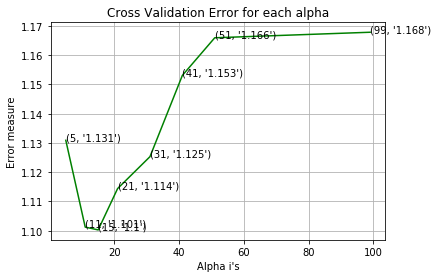

For values of best alpha =  15 The train log loss is: 0.7056892871225193
For values of best alpha =  15 The cross validation log loss is: 1.1002748803755749
For values of best alpha =  15 The test log loss is: 1.0911901980302394


In [ ]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.1002748803755749
Number of mis-classified points : 0.3966165413533835
-------------------- Confusion matrix --------------------


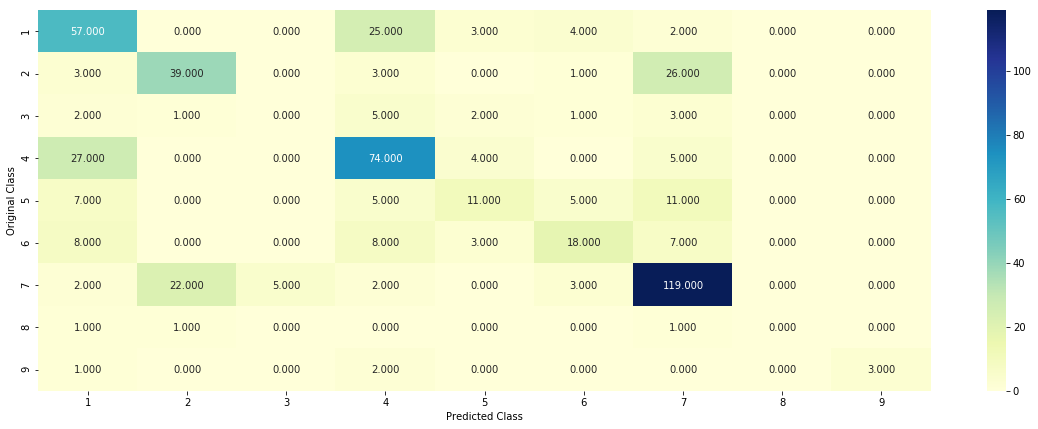

-------------------- Precision matrix (Columm Sum=1) --------------------


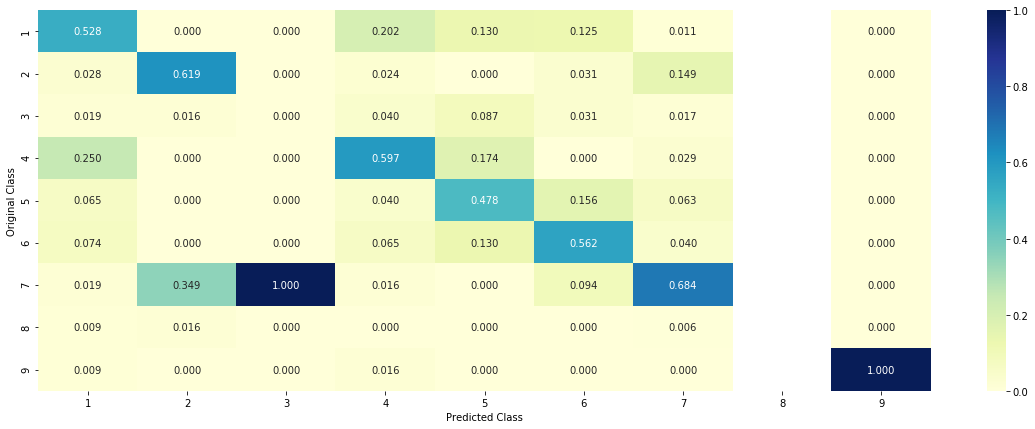

-------------------- Recall matrix (Row sum=1) --------------------


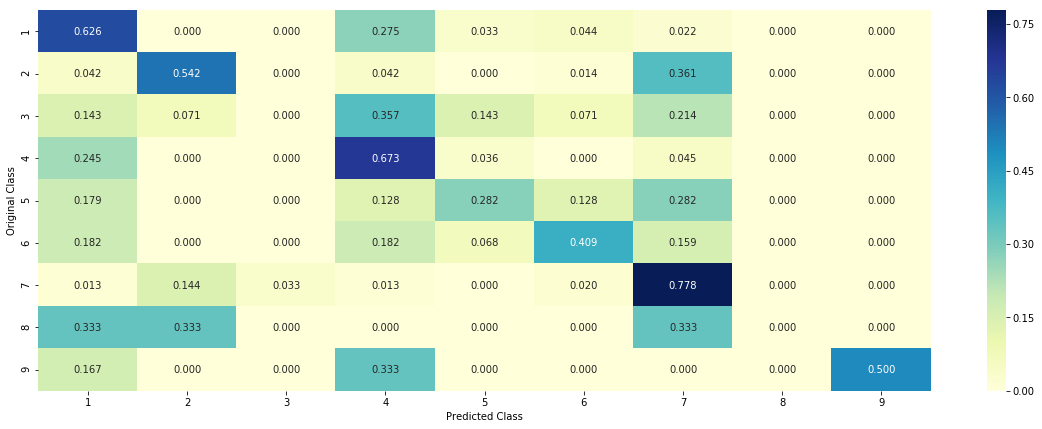

In [ ]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [ ]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 7
The  15  nearest neighbours of the test points belongs to classes [7 7 7 6 6 7 6 7 6 7 7 7 7 7 6]
Fequency of nearest points : Counter({7: 10, 6: 5})


<h3>4.2.4. Sample Query Point-2 </h3>

In [ ]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 15 and the nearest neighbours of the test points belongs to classes [2 7 5 7 7 2 7 7 7 2 7 7 7 7 7]
Fequency of nearest points : Counter({7: 11, 2: 3, 5: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.4554353198842396
for alpha = 1e-05
Log Loss : 1.4602144866667575
for alpha = 0.0001
Log Loss : 1.358469527280309
for alpha = 0.001
Log Loss : 1.217324457704446
for alpha = 0.01
Log Loss : 1.3437838209291793
for alpha = 0.1
Log Loss : 1.5457557924182381
for alpha = 1
Log Loss : 1.706360520395438
for alpha = 10
Log Loss : 1.7261917214695601
for alpha = 100
Log Loss : 1.7282505302427342


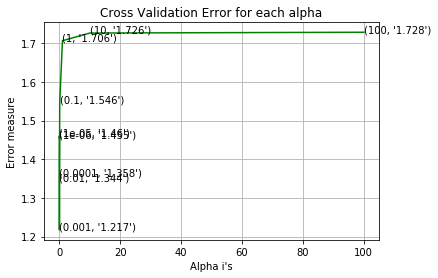

For values of best alpha =  0.001 The train log loss is: 0.6153177097029675
For values of best alpha =  0.001 The cross validation log loss is: 1.217324457704446
For values of best alpha =  0.001 The test log loss is: 1.1047257743181136


In [ ]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.217324457704446
Number of mis-classified points : 0.38345864661654133
-------------------- Confusion matrix --------------------


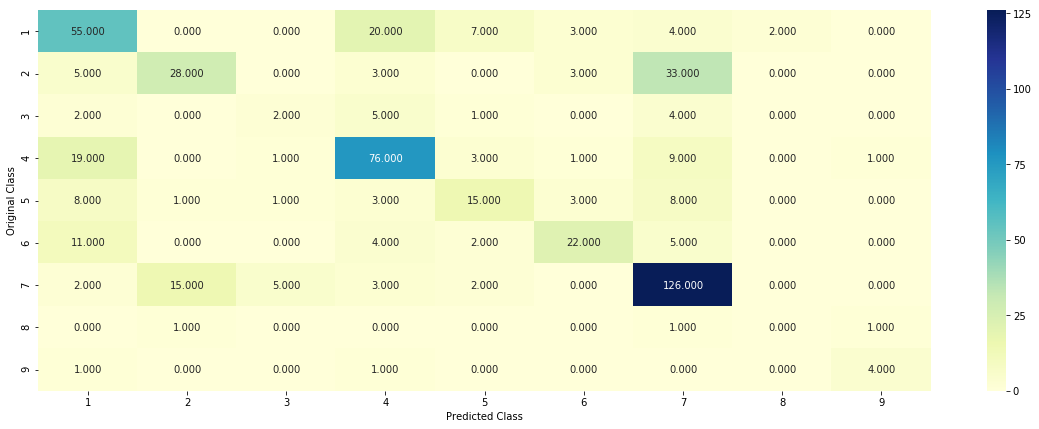

-------------------- Precision matrix (Columm Sum=1) --------------------


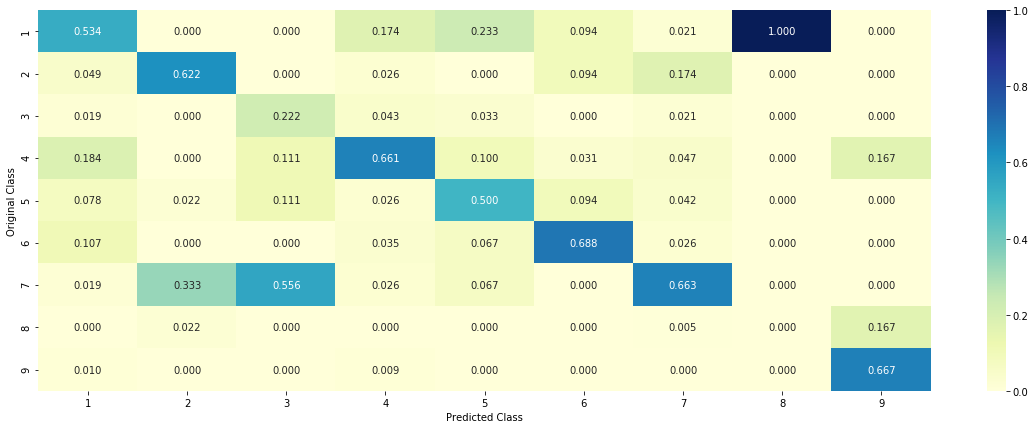

-------------------- Recall matrix (Row sum=1) --------------------


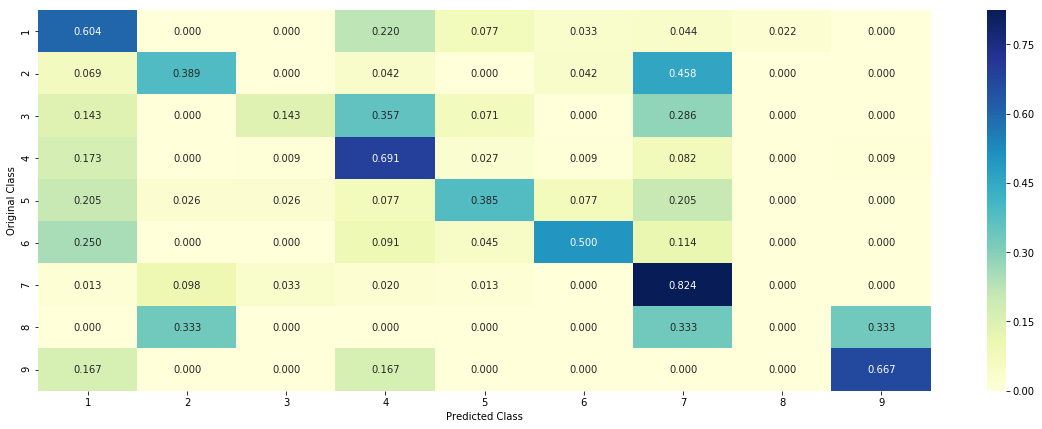

In [ ]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [ ]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [ ]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0045 0.1905 0.0012 0.0012 0.0047 0.0014 0.7872 0.0076 0.0017]]
Actual Class : 7
--------------------------------------------------
23 Text feature [constitutively] present in test data point [True]
39 Text feature [flt1] present in test data point [True]
79 Text feature [oncogene] present in test data point [True]
80 Text feature [oncogenes] present in test data point [True]
84 Text feature [cysteine] present in test data point [True]
89 Text feature [inhibited] present in test data point [True]
137 Text feature [technology] present in test data point [True]
160 Text feature [dramatic] present in test data point [True]
162 Text feature [gaiix] present in test data point [True]
166 Text feature [ligand] present in test data point [True]
177 Text feature [downstream] present in test data point [True]
181 Text feature [concentrations] present in test data point [True]
182 Text feature [thyroid] present in test data point [True]
187 Te

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [ ]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0482 0.2032 0.0108 0.0446 0.071  0.0164 0.5932 0.0078 0.0046]]
Actual Class : 7
--------------------------------------------------
23 Text feature [constitutively] present in test data point [True]
29 Text feature [constitutive] present in test data point [True]
47 Text feature [activated] present in test data point [True]
79 Text feature [oncogene] present in test data point [True]
89 Text feature [inhibited] present in test data point [True]
93 Text feature [transforming] present in test data point [True]
108 Text feature [transform] present in test data point [True]
148 Text feature [receptors] present in test data point [True]
177 Text feature [downstream] present in test data point [True]
210 Text feature [isozyme] present in test data point [True]
217 Text feature [activating] present in test data point [True]
232 Text feature [exchange] present in test data point [True]
326 Text feature [murine] present in test data point [T

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.4395190222240433
for alpha = 1e-05
Log Loss : 1.4613951945118617
for alpha = 0.0001
Log Loss : 1.392640595913179
for alpha = 0.001
Log Loss : 1.2521811628755943
for alpha = 0.01
Log Loss : 1.349151219922669
for alpha = 0.1
Log Loss : 1.457591708320943
for alpha = 1
Log Loss : 1.5902258764770603


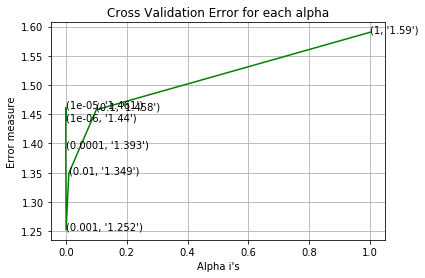

For values of best alpha =  0.001 The train log loss is: 0.6257422677412771
For values of best alpha =  0.001 The cross validation log loss is: 1.2521811628755943
For values of best alpha =  0.001 The test log loss is: 1.1306020069615057


In [ ]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.2521811628755943
Number of mis-classified points : 0.37218045112781956
-------------------- Confusion matrix --------------------


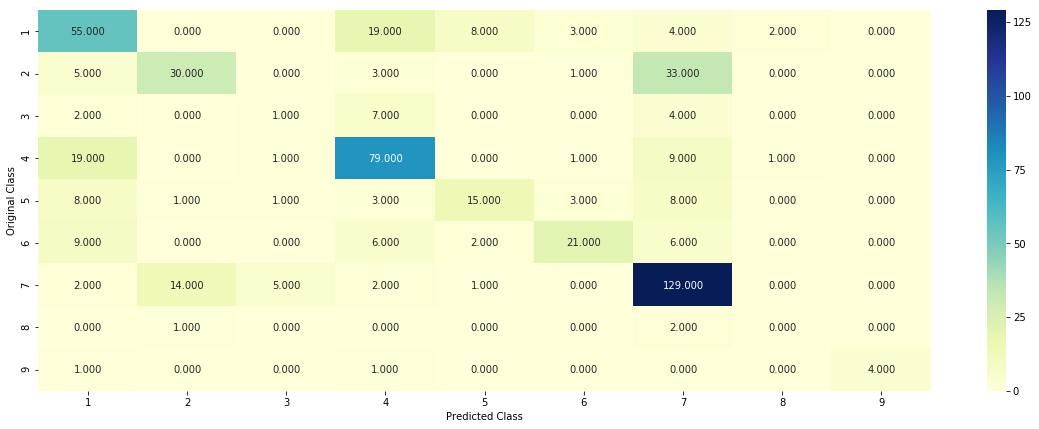

-------------------- Precision matrix (Columm Sum=1) --------------------


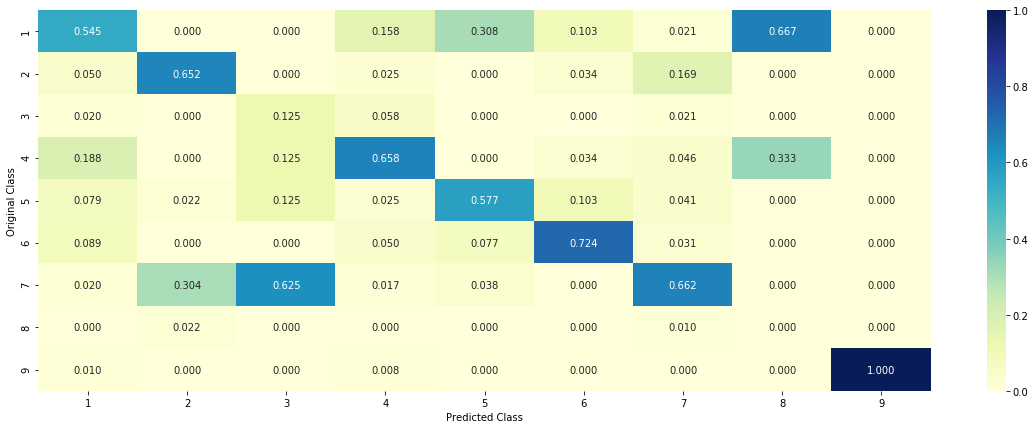

-------------------- Recall matrix (Row sum=1) --------------------


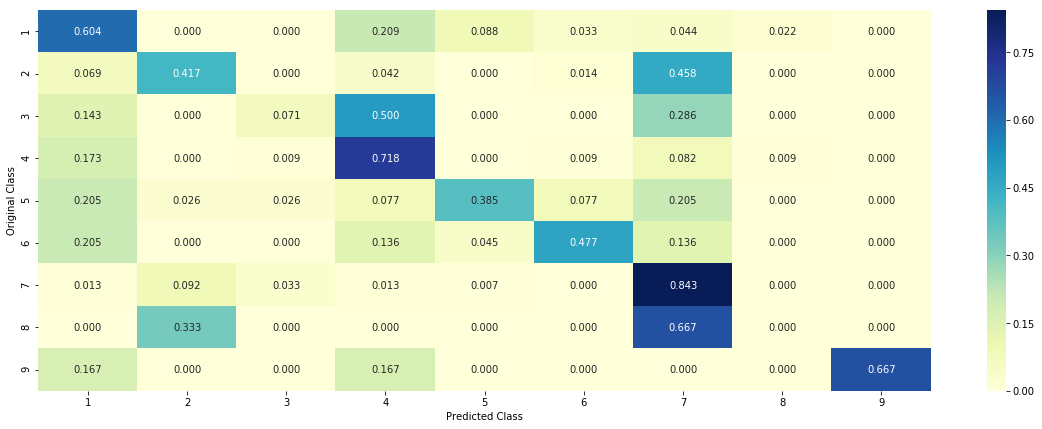

In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.100e-03 1.255e-01 2.000e-04 1.300e-03 2.300e-03 1.400e-03 8.556e-01
  8.500e-03 1.000e-04]]
Actual Class : 7
--------------------------------------------------
60 Text feature [constitutively] present in test data point [True]
107 Text feature [flt1] present in test data point [True]
124 Text feature [cysteine] present in test data point [True]
157 Text feature [oncogenes] present in test data point [True]
158 Text feature [inhibited] present in test data point [True]
195 Text feature [activating] present in test data point [True]
200 Text feature [ligand] present in test data point [True]
203 Text feature [oncogene] present in test data point [True]
204 Text feature [technology] present in test data point [True]
257 Text feature [gaiix] present in test data point [True]
260 Text feature [concentrations] present in test data point [True]
265 Text feature [downstream] present in test data point [True]
314 Text feature [hki] present 

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [ ]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0485 0.1851 0.0052 0.0442 0.0617 0.0143 0.6317 0.0072 0.0022]]
Actual Class : 7
--------------------------------------------------
60 Text feature [constitutively] present in test data point [True]
89 Text feature [constitutive] present in test data point [True]
116 Text feature [activated] present in test data point [True]
158 Text feature [inhibited] present in test data point [True]
159 Text feature [transforming] present in test data point [True]
193 Text feature [receptors] present in test data point [True]
195 Text feature [activating] present in test data point [True]
203 Text feature [oncogene] present in test data point [True]
226 Text feature [transform] present in test data point [True]
241 Text feature [isozyme] present in test data point [True]
265 Text feature [downstream] present in test data point [True]
377 Text feature [agar] present in test data point [True]
442 Text feature [interatomic] present in test data poi

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.4456349250609233
for C = 0.0001
Log Loss : 1.4117883301099556
for C = 0.001
Log Loss : 1.3818342037841624
for C = 0.01
Log Loss : 1.2442964974823838
for C = 0.1
Log Loss : 1.5346828298587332
for C = 1
Log Loss : 1.722800653929441
for C = 10
Log Loss : 1.7286360420759161
for C = 100
Log Loss : 1.7286184454094997


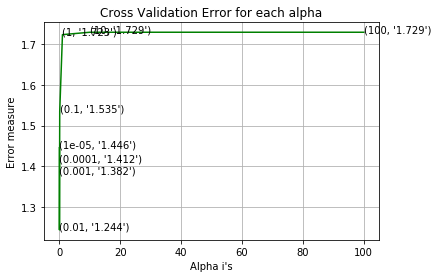

For values of best alpha =  0.01 The train log loss is: 0.7628309867716067
For values of best alpha =  0.01 The cross validation log loss is: 1.2442964974823838
For values of best alpha =  0.01 The test log loss is: 1.1541891969863685


In [ ]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.2442964974823838
Number of mis-classified points : 0.39473684210526316
-------------------- Confusion matrix --------------------


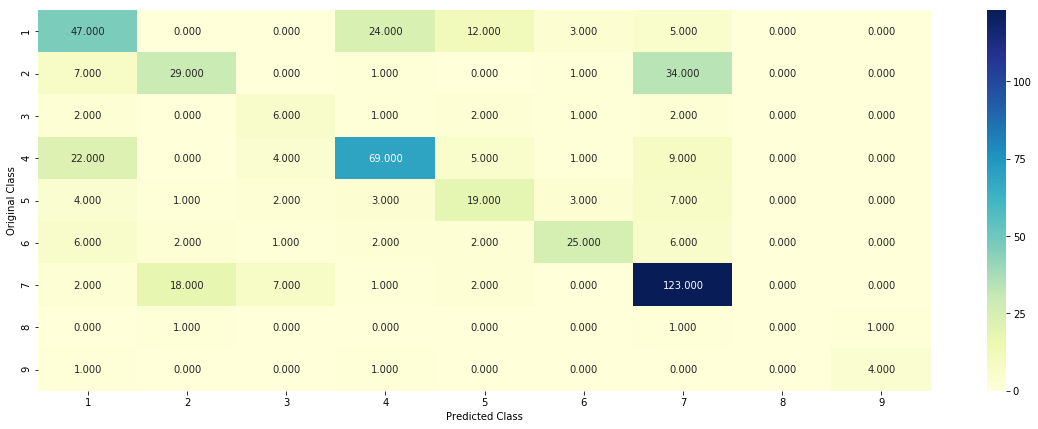

-------------------- Precision matrix (Columm Sum=1) --------------------


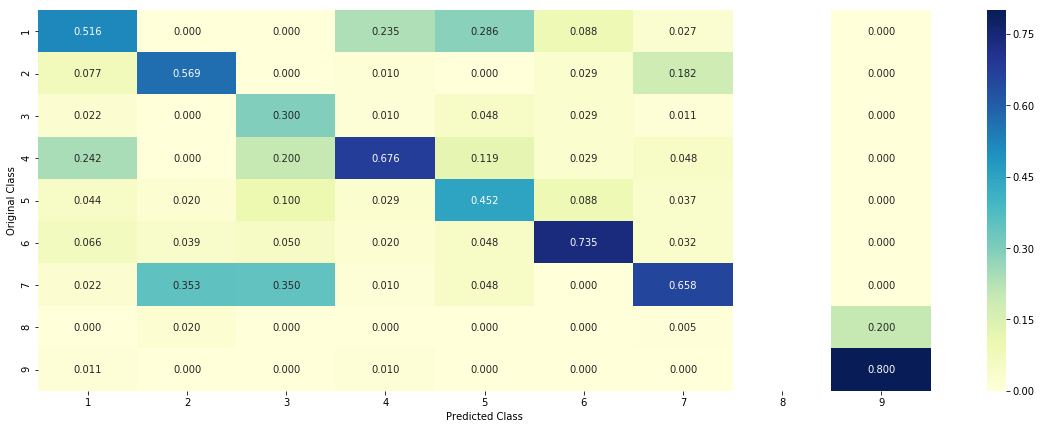

-------------------- Recall matrix (Row sum=1) --------------------


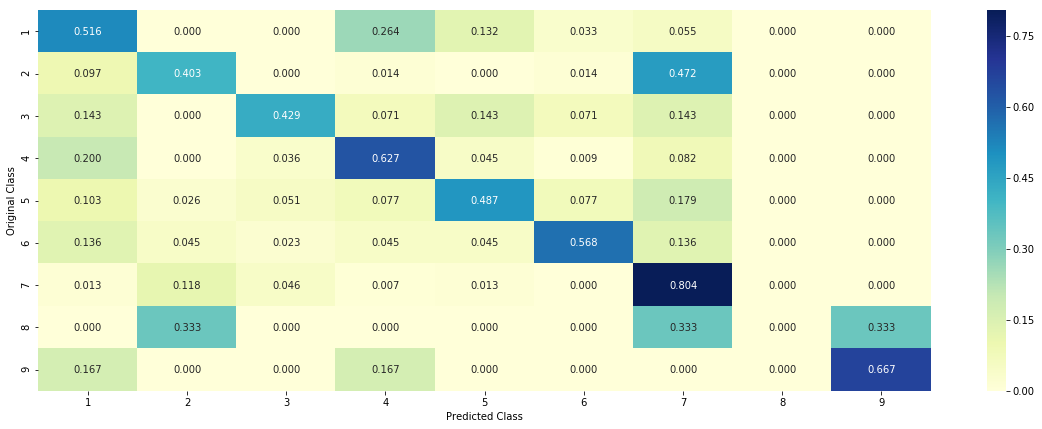

In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0153 0.1199 0.0029 0.0151 0.0121 0.0075 0.8104 0.0129 0.0039]]
Actual Class : 7
--------------------------------------------------
28 Text feature [constitutively] present in test data point [True]
29 Text feature [cysteine] present in test data point [True]
49 Text feature [cdnas] present in test data point [True]
76 Text feature [flt1] present in test data point [True]
79 Text feature [concentrations] present in test data point [True]
82 Text feature [gaiix] present in test data point [True]
96 Text feature [technology] present in test data point [True]
101 Text feature [inhibited] present in test data point [True]
104 Text feature [activating] present in test data point [True]
114 Text feature [oncogenes] present in test data point [True]
147 Text feature [expressing] present in test data point [True]
150 Text feature [mapk] present in test data point [True]
151 Text feature [oncogene] present in test data point [True]
169 Text 

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [ ]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0786 0.1516 0.0146 0.1064 0.1105 0.0323 0.4839 0.0128 0.0094]]
Actual Class : 7
--------------------------------------------------
28 Text feature [constitutively] present in test data point [True]
40 Text feature [constitutive] present in test data point [True]
73 Text feature [activated] present in test data point [True]
75 Text feature [transforming] present in test data point [True]
94 Text feature [receptors] present in test data point [True]
97 Text feature [exchange] present in test data point [True]
101 Text feature [inhibited] present in test data point [True]
104 Text feature [activating] present in test data point [True]
151 Text feature [oncogene] present in test data point [True]
231 Text feature [transform] present in test data point [True]
255 Text feature [activation] present in test data point [True]
279 Text feature [downstream] present in test data point [True]
440 Text feature [doubled] present in test data poin

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [ ]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2572535683354957
for n_estimators = 100 and max depth =  10
Log Loss : 1.1868414223711878
for n_estimators = 200 and max depth =  5
Log Loss : 1.2378734502517341
for n_estimators = 200 and max depth =  10
Log Loss : 1.1811031780258958
for n_estimators = 500 and max depth =  5
Log Loss : 1.2368241894319212
for n_estimators = 500 and max depth =  10
Log Loss : 1.176754594516683
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2357829533963691
for n_estimators = 1000 and max depth =  10
Log Loss : 1.174993079576866
for n_estimators = 2000 and max depth =  5
Log Loss : 1.236042392554891
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1759745074379755
For values of best estimator =  1000 The train log loss is: 0.7095396732082752
For values of best estimator =  1000 The cross validation log loss is: 1.174993079576866
For values of best estimator =  1000 The test log loss is: 1.1630923149103904


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.174993079576866
Number of mis-classified points : 0.38533834586466165
-------------------- Confusion matrix --------------------


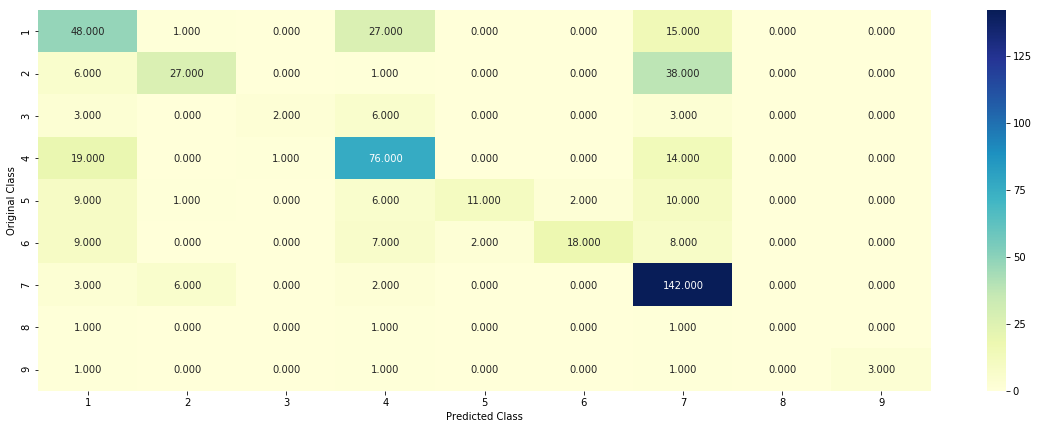

-------------------- Precision matrix (Columm Sum=1) --------------------


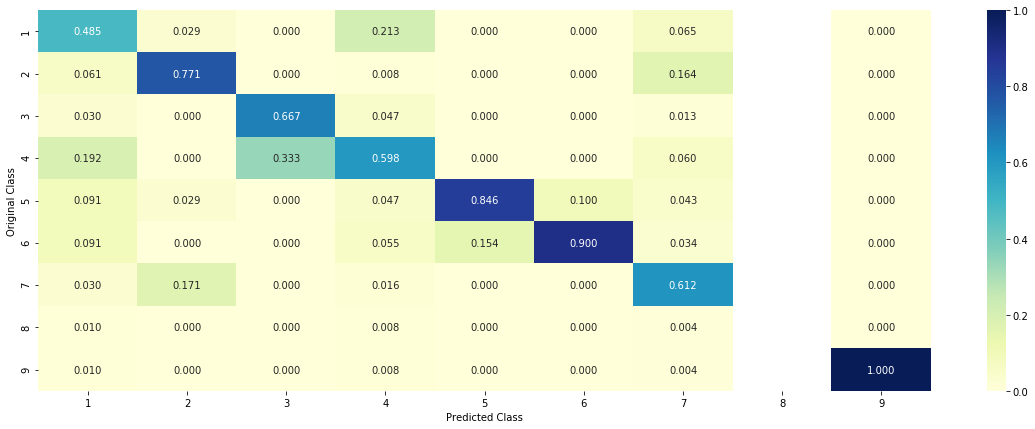

-------------------- Recall matrix (Row sum=1) --------------------


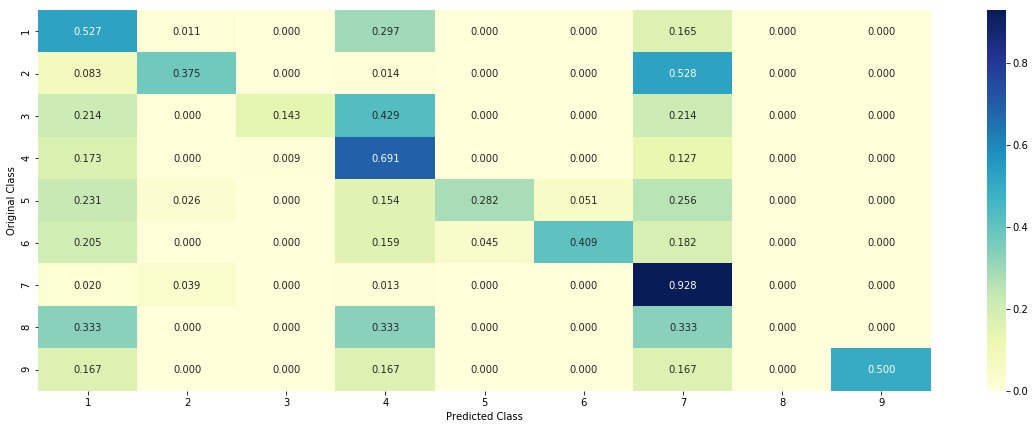

In [ ]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [ ]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0454 0.1404 0.0133 0.029  0.036  0.0294 0.6977 0.005  0.004 ]]
Actual Class : 7
--------------------------------------------------
0 Text feature [inhibitors] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
2 Text feature [activating] present in test data point [True]
3 Text feature [tyrosine] present in test data point [True]
4 Text feature [missense] present in test data point [True]
5 Text feature [inhibitor] present in test data point [True]
7 Text feature [treatment] present in test data point [True]
8 Text feature [oncogenic] present in test data point [True]
9 Text feature [suppressor] present in test data point [True]
10 Text feature [activation] present in test data point [True]
11 Text feature [phosphorylation] present in test data point [True]
12 Text feature [kinases] present in test data point [True]
13 Text feature [nonsense] present in test data point [True]
14 Text feature

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [ ]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1337 0.116  0.0224 0.1773 0.0674 0.0545 0.4156 0.0071 0.0059]]
Actuall Class : 7
--------------------------------------------------
0 Text feature [inhibitors] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
2 Text feature [activating] present in test data point [True]
3 Text feature [tyrosine] present in test data point [True]
6 Text feature [activated] present in test data point [True]
8 Text feature [oncogenic] present in test data point [True]
10 Text feature [activation] present in test data point [True]
11 Text feature [phosphorylation] present in test data point [True]
12 Text feature [kinases] present in test data point [True]
14 Text feature [akt] present in test data point [True]
15 Text feature [function] present in test data point [True]
19 Text feature [growth] present in test data point [True]
21 Text feature [constitutive] present in test data point [True]
25 Text feature [

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [ ]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.2657048897349608
for n_estimators = 10 and max depth =  3
Log Loss : 1.7459205010556096
for n_estimators = 10 and max depth =  5
Log Loss : 1.4368353925512503
for n_estimators = 10 and max depth =  10
Log Loss : 1.904597809032912
for n_estimators = 50 and max depth =  2
Log Loss : 1.7221951095007484
for n_estimators = 50 and max depth =  3
Log Loss : 1.4984825877845531
for n_estimators = 50 and max depth =  5
Log Loss : 1.4593628982873716
for n_estimators = 50 and max depth =  10
Log Loss : 1.8434939703555409
for n_estimators = 100 and max depth =  2
Log Loss : 1.6182209245331227
for n_estimators = 100 and max depth =  3
Log Loss : 1.5199297988828253
for n_estimators = 100 and max depth =  5
Log Loss : 1.4177501184246677
for n_estimators = 100 and max depth =  10
Log Loss : 1.8227504417195126
for n_estimators = 200 and max depth =  2
Log Loss : 1.6622571648074496
for n_estimators = 200 and max depth =  3
Log Loss : 1.480077133914176

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.4177501184246677
Number of mis-classified points : 0.518796992481203
-------------------- Confusion matrix --------------------


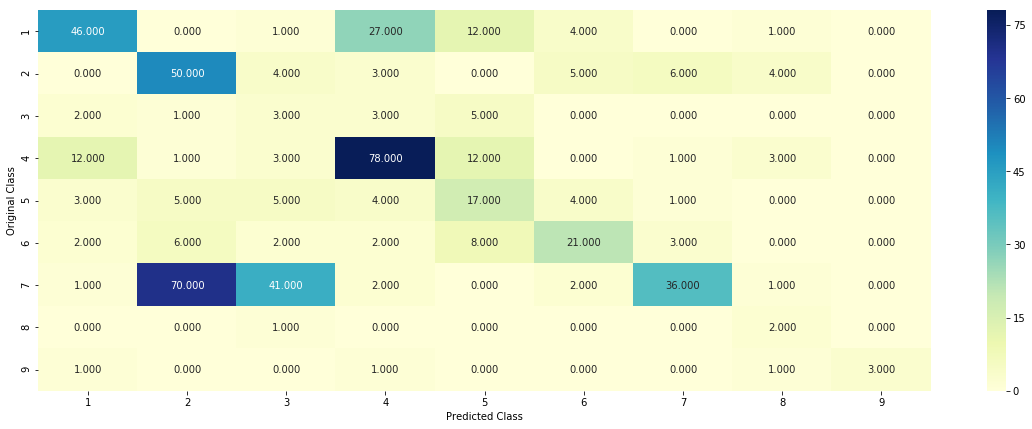

-------------------- Precision matrix (Columm Sum=1) --------------------


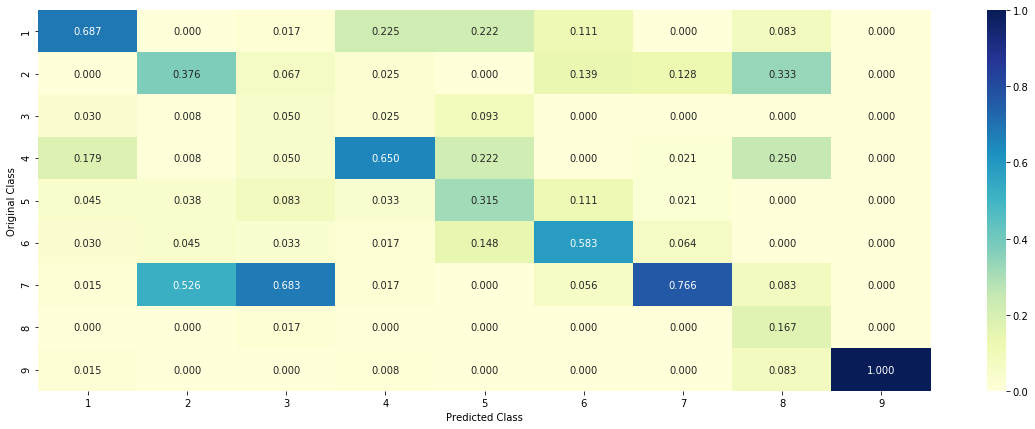

-------------------- Recall matrix (Row sum=1) --------------------


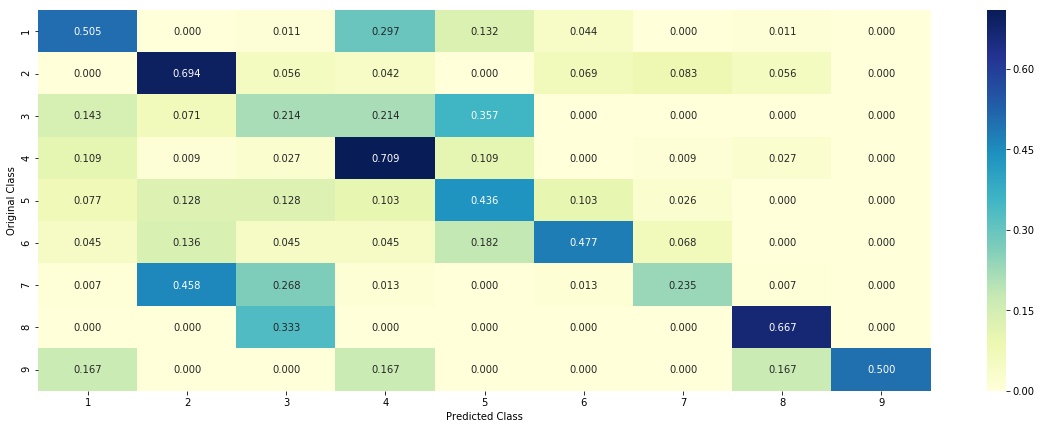

In [ ]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [ ]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0143 0.5044 0.1471 0.0191 0.0245 0.065  0.1724 0.039  0.0142]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [ ]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0281 0.2006 0.203  0.0857 0.0626 0.0906 0.2249 0.0676 0.0369]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [ ]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.24
Support vector machines : Log Loss: 1.72
Naive Bayes : Log Loss: 1.37
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.049
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.577
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.224
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.366
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.690


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.6760284396805781
Log loss (CV) on the stacking classifier : 1.2243084610674686
Log loss (test) on the stacking classifier : 1.1562525475350196
Number of missclassified point : 0.37293233082706767
-------------------- Confusion matrix --------------------


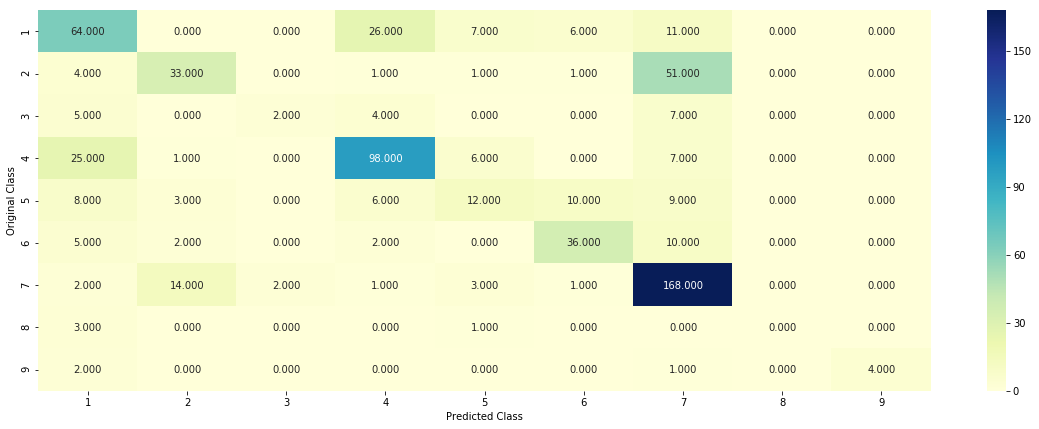

-------------------- Precision matrix (Columm Sum=1) --------------------


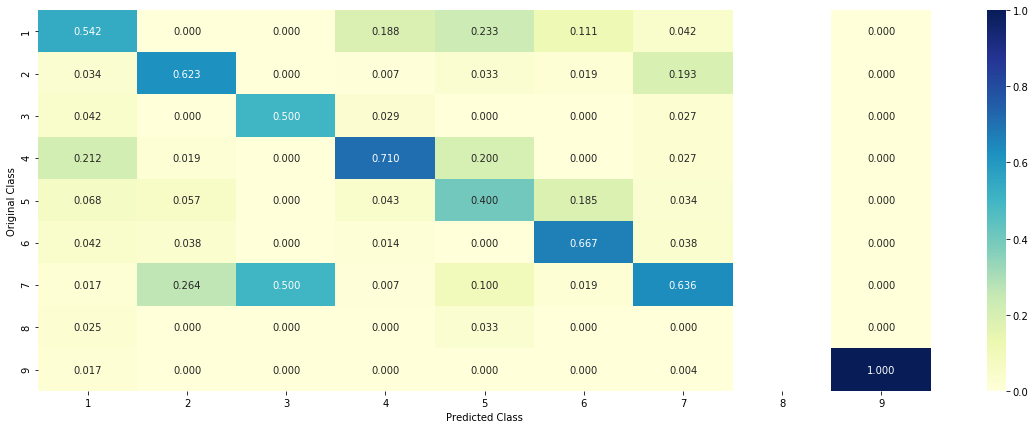

-------------------- Recall matrix (Row sum=1) --------------------


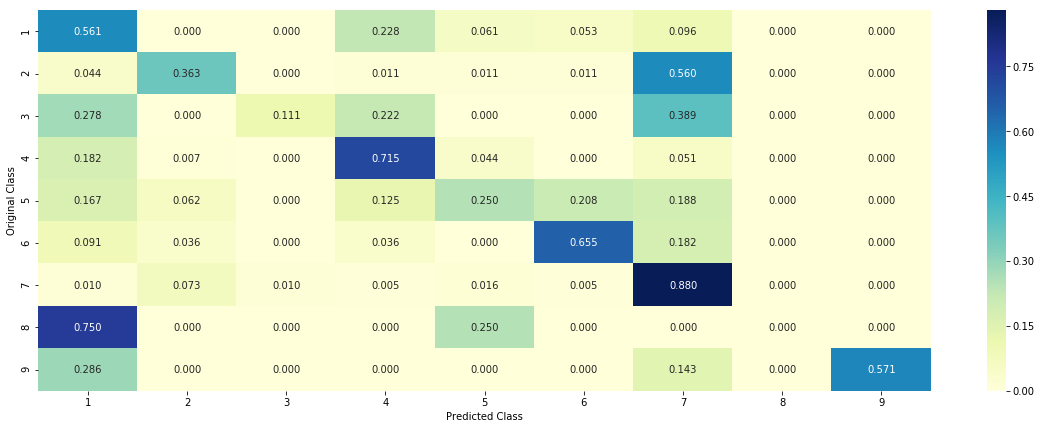

In [ ]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.9407598679043604
Log loss (CV) on the VotingClassifier : 1.2835402100341697
Log loss (test) on the VotingClassifier : 1.223278167176945
Number of missclassified point : 0.3819548872180451
-------------------- Confusion matrix --------------------


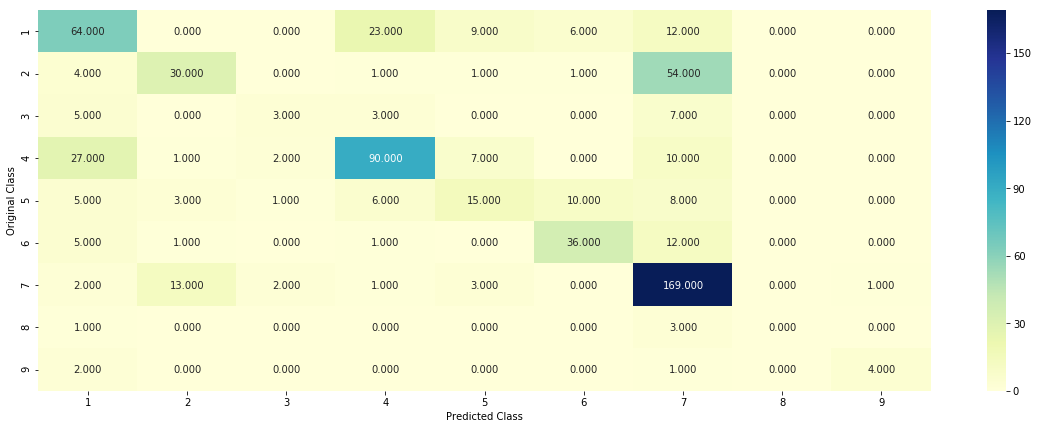

-------------------- Precision matrix (Columm Sum=1) --------------------


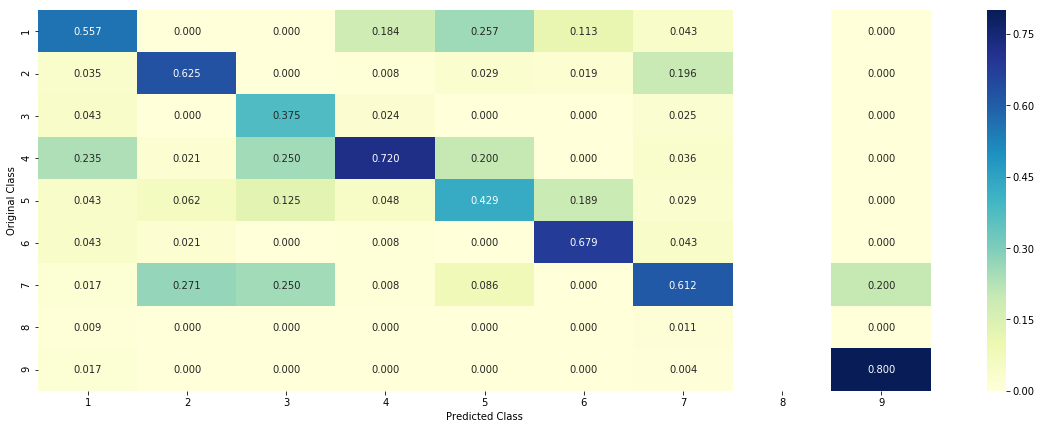

-------------------- Recall matrix (Row sum=1) --------------------


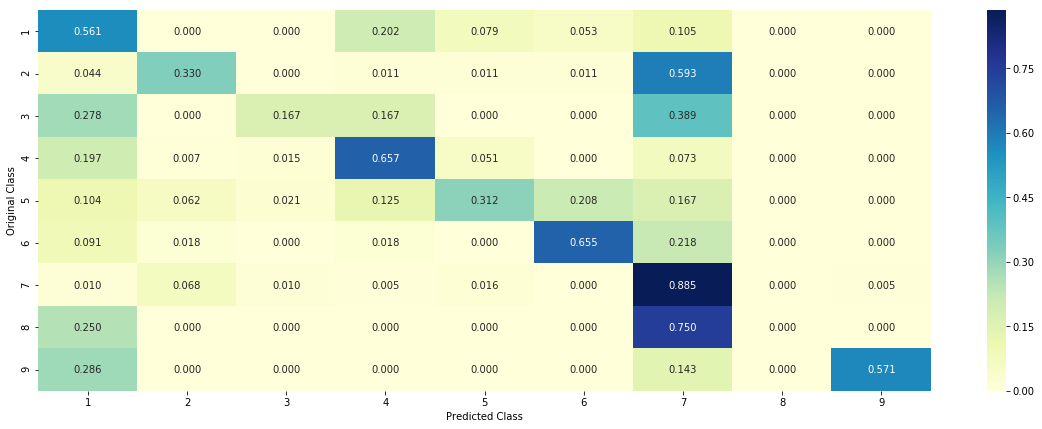

In [ ]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>